In [65]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import yfinance as yf
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import os

In [66]:
data = yf.download("CSX", start="2020-11-01", end="2021-11-01")

[*********************100%***********************]  1 of 1 completed


In [67]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-02,26.776667,27.370001,26.416668,27.253332,26.873913,17485500
2020-11-03,27.543333,28.263332,27.410000,28.073334,27.682499,16795200
2020-11-04,28.493334,29.183332,28.186666,28.276667,27.883001,19347000
2020-11-05,28.503332,29.296667,28.333332,29.010000,28.606123,18312000
2020-11-06,29.059999,29.230000,28.540001,28.726667,28.326735,8671800


In [68]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-25,35.580002,36.060001,35.330002,35.730000,35.636581,11664500
2021-10-26,35.790001,36.000000,35.590000,35.689999,35.596684,10596600
2021-10-27,36.000000,36.279999,35.689999,35.860001,35.766243,10844100
2021-10-28,35.849998,36.299999,35.849998,36.240002,36.145248,8995100
2021-10-29,36.020000,36.450001,35.919998,36.169998,36.075428,9950900


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

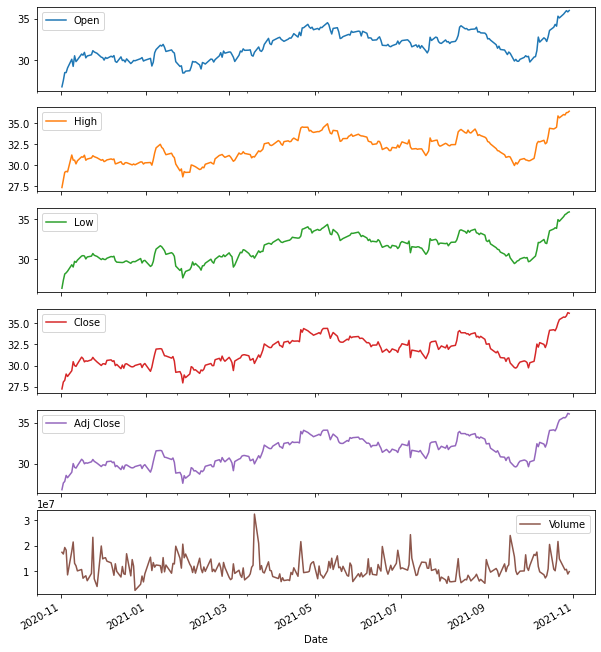

In [69]:
data.plot(figsize=(10, 12), subplots=True)

# DATA SUMMARY

In [70]:
data.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,251.00,251.00,251.00,251.00,251.00,251.00
mean,31.70,32.01,31.42,31.70,31.46,11318806.77
std,1.65,1.62,1.67,1.65,1.70,3989099.54
min,26.78,27.37,26.42,27.25,26.87,2629200.00
25%,30.38,30.69,30.16,30.45,30.18,8692200.00
50%,31.71,31.97,31.45,31.70,31.55,10596600.00
75%,32.80,33.08,32.55,32.84,32.62,13067700.00
max,36.02,36.45,35.92,36.24,36.15,32357400.00


In [71]:
ADJ = data[['Adj Close']]
ADJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-11-02 to 2021-10-29
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  251 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


# ADJUST PRICE SUMMARY

In [72]:
ADJ.describe().round(2)

,Adj Close
count,251.00
mean,31.46
std,1.70
min,26.87
25%,30.18
50%,31.55
75%,32.62
max,36.15


# GRAPH OF PRICE MOVEMENT

array([<AxesSubplot:xlabel='Date'>], dtype=object)

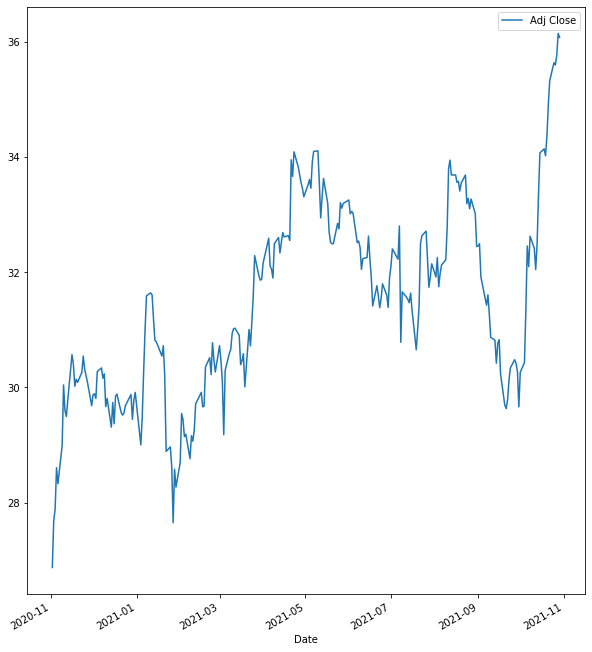

In [73]:
ADJ.plot(figsize=(10, 12), subplots=True)

# VOLATILITY

In [74]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
log_return.head().round(4)

Date
2020-11-02       NaN
2020-11-03    0.0296
2020-11-04    0.0072
2020-11-05    0.0256
2020-11-06   -0.0098
Name: Adj Close, dtype: float64

In [75]:
vol = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 22.24 %


array([<AxesSubplot:xlabel='Date'>], dtype=object)

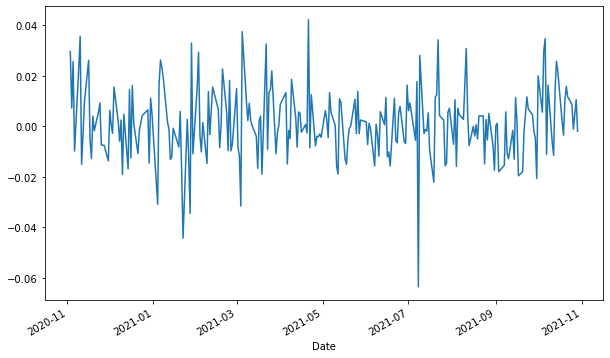

In [76]:
log_return.dropna(inplace=True)
log_return.plot(subplots=True, figsize=(10, 6))

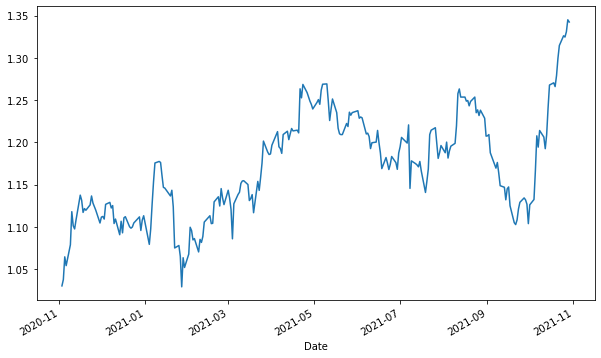

In [78]:
log_return.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [79]:
first_six_vol = round(data['Adj Close'][:125].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The first six months volatility is', first_six_vol, '%')

The first six months volatility is 23.56 %


In [80]:
last_six_vol = round(data['Adj Close'][125:].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The last six months volatility is', last_six_vol, '%')

The last six months volatility is 21.0 %


# Binomial Tree Methodology

In [81]:
S = data['Adj Close'][-1]
print('The spot price is', round(S,2))

The spot price is 36.08


In [82]:
S0 = 36.08              # spot stock price
K = 32.00               # strike
T = 1.0                 # maturity 
r = 0.0144                 #10 year risk free rate sourced from Bloomberg on 02/12/2021 at 4:26pm
sig = 0.2224               # diffusion coefficient or volatility annualized.
q = 0.0108              # Forward dividend and yield sourced from yahoofinance on 02/12/2021 at 4:29pm.
N = 3                   # number of periods or number of time steps  
payoff = "call"          # payoff 

In [83]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [84]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [85]:
S

array([[36.08      , 41.02334911, 46.64399036, 53.03472007],
       [ 0.        , 31.73232874, 36.08      , 41.02334911],
       [ 0.        ,  0.        , 27.90855564, 31.73232874],
       [ 0.        ,  0.        ,  0.        , 24.5455505 ]])

In [86]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.48662809757895575

In [87]:
q

0.5133719024210442

In [88]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        , 21.03472007],
       [ 0.        ,  0.        ,  0.        ,  9.02334911],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [89]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 5.63317716,  9.39895022, 14.79722231, 21.03472007],
       [ 0.        ,  2.11637633,  4.36998884,  9.02334911],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [90]:
print('European ' + payoff, str( V[0,0]))

European call 5.6331771567182525


# Black Scholes Methodology

In [91]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [92]:
euro_option_bsm(36.08, 32.00, 1, 0.0144, 0.0108, 0.2224, 'call')

5.497200964228483

In [93]:
T = np.linspace(0.25,3,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(36.08, 32.00, T[i], 0.0144, 0.0108, 0.2224, 'call')

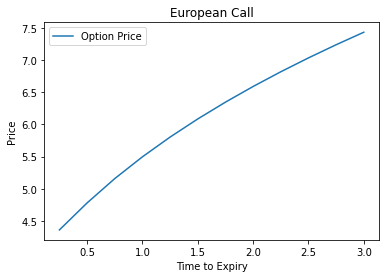

In [94]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

# Greeks

# 1. Delta

Option delta helps to analyze that how sensible is option price towards the change in underlying assets

In [95]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [96]:
S = np.linspace(30, 50, 51)
T = np.linspace(0.5, 2, 10)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 32.00, T[i], 0.0144, 0.0108, 0.2224, 'call')

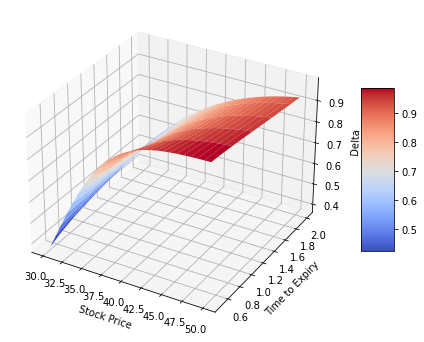

In [97]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [98]:
d = delta(36.08, 32.00, 1, 0.0144, 0.0108, 0.2224, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.7396 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.7396 .


# 2. Gamma

Gamma responds to the change in option delta that leads to change in the value of stock price. Gamma tends to rise if underlying assets is close to expiration.

In [99]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [101]:
gamma(36.08, 32.00, 1, 0.0144, 0.0108, 0.2224, 'call')

0.0392335654966138

In [102]:
S = np.linspace(30,50,51)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 32.00, 1, 0.0144, 0.0108, 0.2224, 'call')

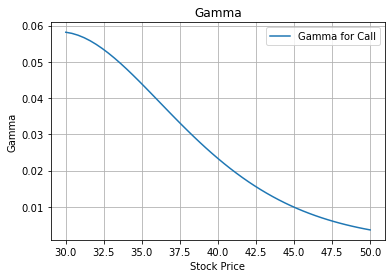

In [103]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

In [104]:
S = np.linspace(30, 50, 10)
T = np.linspace(0.5, 2, 10)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 32.00, T[i], 0.0144, 0.0108, 0.2224, 'call')

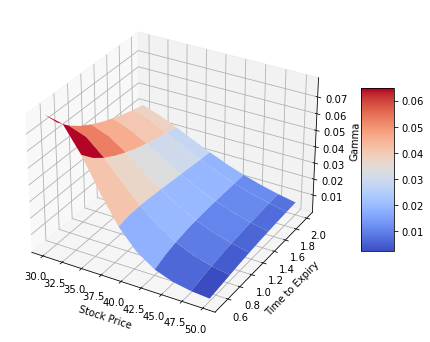

In [105]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# 3. Vega

Vega considers the implied volatility that affects the price of the stock. Implied volatility refers to market’s estimation which is calculated by the standard deviation. The higher
the volatility the higher the sensitivity of option.

In [106]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [108]:
S = np.linspace(30, 50, 51)
T = np.linspace(0.5, 2, 10)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 32.00, T[i], 0.0144, 0.0108, 0.2224, 'call')

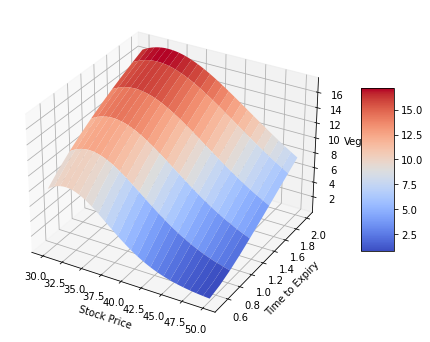

In [109]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [110]:
v = vega(36.08, 32.00, 1, 0.0144, 0.0108, 0.2224, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 11.3996 . If the volatility increases 1%, then the value of the option will increase $ 0.113996 .


# 4. Theta

Theta considers the time of expiry. The lesser the time of expiry, the lesser the option pricing. 

In [111]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [112]:
S = np.linspace(30, 50, 51)
T = np.linspace(0.5, 2, 10)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 32.00, T[i], 0.0144, 0.0108, 0.2224, 'call')

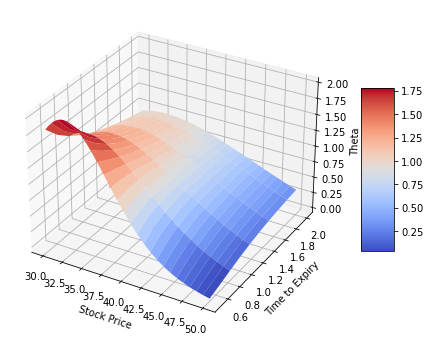

In [113]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [114]:
theta(36.08, 32.00, 1, 0.0144, 0.0108, 0.2224, 'call')

1.2845359285600524

# 5. Rho

Rho considers the interest rate that is available in the market. Since the interest rate is usually fixed for a long period of time, Rho is used less.However, Rho is very useful for the underlying assets that are held for long term.

In [115]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [116]:
S = np.linspace(30, 50, 51)
T = np.linspace(0.5, 2, 10)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 32.00, T[i], 0.0144, 0.0108, 0.2224, 'call')

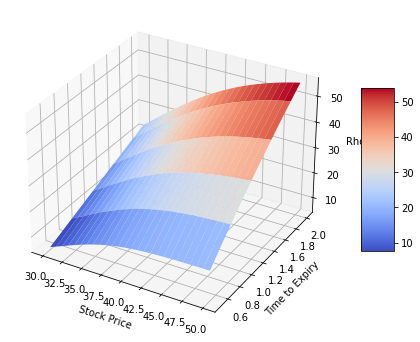

In [117]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [118]:
rho(36.08, 32.00, 1, 0.0144, 0.0108, 0.2224, 'call')

21.186593646948655

In [120]:
r = rho(36.08, 32.00, 1, 0.0144, 0.0108, 0.2224, 'call')
print('The value of Rho is', r.round(4),'.','If the risk-free interest rate increases 1%, then the value of the option will increase by $', r.round(4)*0.01, '.')

The value of Rho is 21.1866 . If the risk-free interest rate increases 1%, then the value of the option will increase by $ 0.211866 .
